# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Elemento de lista
*   Elemento de lista



In [76]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

import pandas as pd  
import nltk
import re

from nltk.stem import WordNetLemmatizer
from nltk.stem import RegexpStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import fasttext
import fasttext.util
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##**Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [23]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


dfa = pd.read_csv('amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb5.txt', sep='\s{3,}', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')

df = pd.concat([dfa,dfi,dfy], ignore_index = True)

print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

# *********** Aquí termina la sección de agregar código *************


Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (1000, 2)
Total de registros de Yelp: (1000, 2)


C:\Users\ingsa\AppData\Local\Temp\ipykernel_36980\1163479391.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfi = pd.read_csv('imdb5.txt', sep='\s{3,}', names=['review','label'], header=None, encoding='utf-8')


In [24]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [25]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [26]:
nltk.download('punkt') 
nltk.download('stopwords')
wnl = WordNetLemmatizer() 

print(len(stopwords.words('english')))
print(stopwords.words('english'))

negwords = ['no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
mystopwords = stopwords.words('english') # Generamos el arreglo para las stop words

# Se genera un ciclo para evaluar cuales palabras quitaremos de nuestro arreglo final
for x in mystopwords:
    if x in negwords:
        mystopwords.remove(x)

print(len(mystopwords))
print(mystopwords)

158
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 've

In [28]:
X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,) 
assert Y.shape == (3000,)

In [29]:
def clean_tok(doc):
    
    Xwords = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', doc) # Se define la expresion regular para caracteres especiales
    Xtoks = [Xwords.lower().split()] # Los tokens pasan a minuscula
    Xclean = [[t for t in x if t not in mystopwords and len(t) > 1] for x in Xtoks] # Se eliminan las stopwords y los caracteres menores a 1
    token = [t for x in Xclean for t in x] # se retornan los tokens finales
    token_final = [wnl.lemmatize(w) for w in token] # Se aplica lemannización
    
    return token_final

In [30]:
# Aplicamos el proceso de limpieza y tokenización:

Xclean = [clean_tok(x) for x in X] 

In [31]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['no', 'way', 'plug', 'u', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversation', 'lasting', 'minute', 'major', 'problem']
['mic', 'great']


In [32]:
pos_tok=[]  # inicializamos listas de los tokens positivos y negativos
neg_tok=[] 


for x,c in zip(Xclean, Y):   
  if c==1:
    pos_tok.extend(x)   # tokens usados en comentarios positivos
  else: 
    neg_tok.extend(x)   # tokens usados en comentarios negativos

pt = ' '.join(pos_tok)   # requerimos un solo string por cada clase para la nube de palabras.
nt = ' '.join(neg_tok)

print('String de los comentarios/tokens filtrados positivos:\n', pt[0:100])
print('\nString de los comentarios/tokens filtrados negativos:\n', nt[0:100])

String de los comentarios/tokens filtrados positivos:
 good case excellent value great jawbone mic great razr owner must sound quality great impressed goin

String de los comentarios/tokens filtrados negativos:
 no way plug u unless go converter tied charger conversation lasting minute major problem jiggle plug


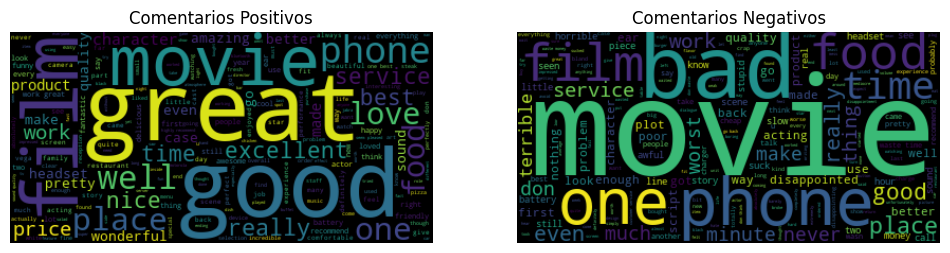

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Nube de palabras de comentarios positivos:
wordcloudnn = WordCloud().generate(pt)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Comentarios Positivos')

# Nube de palabras de comentarios negativos:
wordcloudnn = WordCloud().generate(nt)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Comentarios Negativos')

plt.show()

#**Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [34]:

# ************* Inicia la sección de agregar código:*****************************

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


#**Pregunta - 4:**



Construye tu vocabulario a continuación


In [35]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k]) 

min_freq = 3
midicc = {key: value for key , value in midiccionario.items() if value > min_freq}

# *********** Aquí termina la sección de agregar código *************

In [36]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********

print(len(midicc))  
print('\n(word,frequency):') 
print(list(midicc.items())[0:10])

# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
691

(word,frequency):
[('star', 18), ('don', 56), ('much', 39), ('better', 38), ('people', 23), ('like', 89), ('wasted', 8), ('special', 12), ('sucked', 11), ('not', 218)]


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [37]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

# *********** Aquí termina la sección de agregar código *************


In [38]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['star', 'don', 'much', 'better', 'people', 'like', 'wasted']
['special', 'sucked']
['not', 'tip', 'felt', 'server', 'terrible', 'job']
['call', 'steak', 'don', 'understand']
['however', 'sometimes', 'wrong', 'button']


#**Pregunta - 5:**


a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de Google y Glove de Stanford.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++


#**Pregunta - 6:**

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el “valor” será su vector embebido de dimensión 300.

Este diccionario deberá ser del mismo tamaño que el vocabulario previo que hayas construido previamente.

Es recomendable que una vez que generes el nuevo vocabulario de vectores embebidos, guardes dicho diccionario en un archivo.

Recuerda borrar la variable donde descargaste los 2 millones de vectores embebidos Fasttext.



In [39]:
#fasttext.util.download_model('en', if_exists='ignore')  # English

 (41.56%) [====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]====================>                              ]=

 (71.44%) [===================================>               ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]==================================>                ]=

 (93.15%) [==============================================>    ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=============================================>     ]=

 (100.00%) [==================================================>]================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=

'cc.en.300.bin'

In [40]:
ft = fasttext.load_model('cc.en.300.bin')

In [47]:
# Crear un diccionario clave-valor
vocab_embedded = {}
for word in midicc:
    if word in ft:
        vocab_embedded[word] = ft[word]
    else:
        # Si la palabra no está en los vectores preentrenados, usa un vector de ceros
        vocab_embedded[word] = np.zeros(300)

with open('vocab_embedded.pkl', 'wb') as f:
    pickle.dump(vocab_embedded, f)

In [42]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

ft.get_word_vector('good')

# *********** Aquí termina la sección de agregar código *************

array([-0.09213716, -0.0634383 ,  0.00173813,  0.13524324, -0.06561062,
        0.00619071,  0.12609869, -0.01646539,  0.0174491 , -0.00126792,
       -0.09709831,  0.02329333,  0.00996784,  0.00463419,  0.01587938,
        0.00689824,  0.08575399, -0.01988525, -0.0601579 , -0.02327966,
        0.01183712,  0.08217917,  0.01488847,  0.00902181,  0.00696296,
       -0.06426616,  0.03345198, -0.02101481,  0.06767873,  0.03022419,
        0.07203474, -0.05689922, -0.04370377,  0.00642597,  0.0439174 ,
        0.0604848 , -0.00611545, -0.12256738, -0.03530414, -0.02696739,
       -0.02058216,  0.00752347, -0.00686451,  0.0362783 , -0.03308735,
        0.05801626,  0.00832448, -0.06336953, -0.05775082,  0.01089846,
       -0.0925179 ,  0.01559984, -0.04079024,  0.0066871 , -0.06374165,
        0.05881973,  0.07209535, -0.05387195, -0.14658651, -0.04046486,
       -0.02507038, -0.04954465, -0.05224417, -0.06846938,  0.0467079 ,
        0.00459271, -0.07522177,  0.03627685, -0.0698283 ,  0.01

In [43]:
ft.get_nearest_neighbors('good')

[(0.7517593502998352, 'bad'),
 (0.7426098585128784, 'great'),
 (0.7299689054489136, 'decent'),
 (0.7123614549636841, 'nice'),
 (0.6796907186508179, 'Good'),
 (0.6737031936645508, 'excellent'),
 (0.669592022895813, 'goood'),
 (0.6602178812026978, 'ggod'),
 (0.6479219794273376, 'semi-good'),
 (0.6417751908302307, 'good.Good')]

#**Pregunta - 7:**



Generamos los vectores embebidos a paertir de los conjuntos de entrenamiento, validación y preuba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [51]:
# Cargar el diccionario de vectores embebidos
with open('vocab_embedded.pkl', 'rb') as f:
    vocab_embedded = pickle.load(f)

In [57]:
def coment_vector_embedings(tok_comments,vocab,dim=300):
    embedding = []
    for tokens in tok_comments:
        vector = [vocab[token] for token in tokens if token in vocab]
        
        if vector:
            # Promedia los vectores por palabra
            tocken_embedding = np.mean(vector, axis=0)
        else:
            # Si no existen coincidencias, usar vector de ceros
            tocken_embedding = np.zeros(dim)
            
        embedding.append(tocken_embedding)
    
    return np.array(embedding)

In [58]:
trainEmb = coment_vector_embedings(train_x,vocab_embedded)
valEmb = coment_vector_embedings(val_x,vocab_embedded)
testEmb = coment_vector_embedings(test_x,vocab_embedded)

In [59]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 300)
Val-Emb: (450, 300)
Test-Emb: (450, 300)


#**Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [73]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

modeloLRcount = LogisticRegression(max_iter = 100, C=1.)
modeloLRcount.fit(trainEmb,y_train)

print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(trainEmb, y_train)))
print('LR: Val-accuracy: %.2f%%' %  (100*modeloLRcount.score(valEmb, y_val)))

# *********** Aquí termina la sección de agregar código *************


LR: Train-accuracy: 82.00%
LR: Val-accuracy: 81.11%


In [74]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

modeloRFcount = RandomForestClassifier(n_estimators=100, random_state=42)
modeloRFcount.fit(trainEmb,y_train)

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(trainEmb, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(valEmb, y_val)))

# *********** Aquí termina la sección de agregar código *************


RF: Train-accuracy: 98.48%
RF: Val-accuracy: 79.78%


#**Pregunta - 9:**



Reporte del mejor modelo.


In [78]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

mejor_modelo = LogisticRegression(max_iter = 100, C=1.)
mejor_modelo.fit(testEmb,y_test)

print('Test-accuracy con el mejor modelo Logistic Regression %.2f%%' % (100*mejor_modelo.score(testEmb, y_test)))

pred = mejor_modelo.predict(testEmb)
print('\nMatriz de confusión con el mejor modelo LR:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

# *********** Aquí termina la sección de agregar código *************

Test-accuracy con el mejor modelo Logistic Regression 80.44%

Matriz de confusión con el mejor modelo LR:
[[172  44]
 [ 44 190]]


#**Pregunta - 10:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++

##**Fin de la Actividad de vectores Embebidos - FastText**